In [ ]:
from typing_extensions import TypedDict
from typing import List, Annotated
from langgraph.graph import add_messages
from langchain_core.messages import AnyMessage

class State(TypedDict):
    messages: Annotated[List[AnyMessage], add_messages]



In [5]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')


In [7]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model='gpt-5-mini-2025-08-07'
)

In [8]:
def add(a:int, b:int)->int:
    """ Add a and b
    Args:
        a (int): first int
        b (int): second int

    Returns:
        int
    """
    return a+b

In [10]:
llm_with_tool = llm.bind_tools([add])

def llm_tool(state:State):
    return {"messages": llm_with_tool.invoke(state["messages"])}

In [11]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(State)

tools = [add]

builder.add_node("llm_tool", llm_tool)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm_tool")
builder.add_conditional_edges("llm_tool", tools_condition)

builder.add_edge("tools", END)

graph_builder = builder.compile()


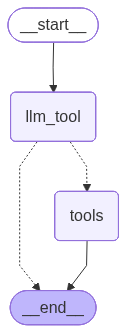

In [14]:
from IPython.display import Image, display

display(Image(graph_builder.get_graph().draw_mermaid_png()))